# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [7]:
# making an API call
import requests

# Grab the url for the api_endpoint
api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'
pokemon = input('What Pokemon are you looking for? ')
response = requests.get(api_endpoint+pokemon)

if response.status_code == 200:
    data = response.json()
    print(data)
    
else:
    print(f'Error, Status Code {response.status_code}')

What Pokemon are you looking for? ditti
Error, Status Code 404


### Display a Pokemon's name, weight, abilities, and types

In [4]:
# get the name
name = data['forms'][0]['name']

In [5]:
# get types
types = data['types']

In [6]:
# get weight
weight = data['weight']

In [11]:
# get abilities
abilities = data['abilities']
# print(abilities)
list_of_abilities = [ability['ability']['name'] for ability in abilities]
print(list_of_abilities)

['limber', 'imposter']


In [23]:
# Create a structure for a single pokemon
poke_information = {
    'name': data['forms'][0]['name'],
    'types': data['types'],
    'weight': data['weight'],
    'abilities': [ability['ability']['name'] for ability in abilities]
}
print(poke_information['abilities'])

['limber', 'imposter']


#### Create a function to Pull in your own Pokemon's data 

In [42]:
def poke_api_call(pokemon):
    poke_dict = {}
    response = requests.get(api_endpoint+pokemon)
    if response.status_code == 200:
        data = response.json()
        poke_dict = { 
            'name': data['forms'][0]['name'],
            'types': [type['type']['name'] for type in data['types']],
            'weight': data['weight'],
            'abilities': [ability['ability']['name'] for ability in abilities]
        }
    else:
        print(f'Error, Status Code {response.status_code}')
    return poke_dict

poke_api_call(input('What kind of pokemon?: '))

What kind of pokemon?: ditto


{'name': 'ditto',
 'types': ['normal'],
 'weight': 40,
 'abilities': ['limber', 'imposter']}

Choose your pokemon

In [48]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']

your_team_dict = {pokemon:poke_api_call(pokemon) for pokemon in your_team}
print(your_team_dict)

{'electabuzz': {'name': 'electabuzz', 'types': ['electric'], 'weight': 300, 'abilities': ['limber', 'imposter']}, 'haunter': {'name': 'haunter', 'types': ['ghost', 'poison'], 'weight': 1, 'abilities': ['limber', 'imposter']}, 'tyranitar': {'name': 'tyranitar', 'types': ['rock', 'dark'], 'weight': 2020, 'abilities': ['limber', 'imposter']}, 'blaziken': {'name': 'blaziken', 'types': ['fire', 'fighting'], 'weight': 520, 'abilities': ['limber', 'imposter']}, 'marowak': {'name': 'marowak', 'types': ['ground'], 'weight': 450, 'abilities': ['limber', 'imposter']}, 'dragonair': {'name': 'dragonair', 'types': ['dragon'], 'weight': 165, 'abilities': ['limber', 'imposter']}}


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [45]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}
for i in random_team:
    new_poke = poke_api_call(str(i))
    my_six_pokemon[new_poke['name']] = new_poke

for key in my_six_pokemon:
    print(key, '=', my_six_pokemon[key], '\n')
    


sandygast = {'name': 'sandygast', 'types': ['ghost', 'ground'], 'weight': 700, 'abilities': ['limber', 'imposter']} 

pikachu = {'name': 'pikachu', 'types': ['electric'], 'weight': 60, 'abilities': ['limber', 'imposter']} 

chikorita = {'name': 'chikorita', 'types': ['grass'], 'weight': 64, 'abilities': ['limber', 'imposter']} 

sylveon = {'name': 'sylveon', 'types': ['fairy'], 'weight': 235, 'abilities': ['limber', 'imposter']} 

oddish = {'name': 'oddish', 'types': ['grass', 'poison'], 'weight': 54, 'abilities': ['limber', 'imposter']} 

seel = {'name': 'seel', 'types': ['water'], 'weight': 900, 'abilities': ['limber', 'imposter']} 



## Lets create a class called 'Pokemon' and create our pokemon as instances

In [55]:
class Pokemon():
    def __init__(self, pokemon):
        self.name = pokemon
        self.abilities = []
        self.types = []
        self.weight = None
        self.picture = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f'{api_endpoint}{self.name}')
        if response.status_code == 200:
            print('Success')
            data = response.json()
            self.name = data['forms'][0]['name'],
            self.types = [type_d['type']['name'] for type_d in data['types']]
            self.weight = data['weight']
            self.abilities = [ability['ability']['name'] for ability in abilities]
            self.picture = data['sprites']['front_default']
        else:
            print(f'Error Status Code {response.status_code}')
            
charmander = Pokemon(1)
print(charmander.name)
print(charmander.picture)

Success
('bulbasaur',)
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png


### Let's Catch some Pokemon

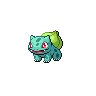

In [56]:
from IPython.display import Image
display(Image(charmander.picture))

In [67]:
class Pokedex:
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon)
    def print_pokedex(self):
        print(f'{self.username}\'s Pokedex')
        for key in self.pokemon:
            print(f'{key}:{self.pokemon[key]}')

yy_dex = Pokedex("YY")
yy_dex.add_pokemon('charmander')
yy_dex.add_pokemon('mudkip')
yy_dex.print_pokedex()

Success
Success
YY's Pokedex
charmander:<__main__.Pokemon object at 0x7fb1b8fe54b0>
mudkip:<__main__.Pokemon object at 0x7fb1c87c1900>


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [260]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [69]:
# recreate your pokemon class here
from IPython.display import Image
import requests

class Pokemon:
    
    def __init__(self, pokemon):
        self.name = pokemon
        self.image = None
        self.call_poke_api()
    
    def call_poke_api(self):
        response = requests.get(f'{api_endpoint}{self.name}')
        if response.status_code == 200:
            data = response.json()
            self.image = data['sprites']['front_default']
        else:
            print('Error Status Code {response.status_code}')

    def print_image(self):
        display(Image(self.image))

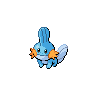

In [70]:
mudkip = Pokemon('mudkip')
mudkip.print_image()

In [18]:
# Calling our new method


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [103]:
import requests
# 1) fetch species from species_endpoint = 'https://pokeapi.co/api/v2/pokemon-species/'
# 2) grab evolution chain & fetch the chain
# 3) get the full list of evolutions

class Pokemon:
    def __init__(self, pokemon):
        self.name = pokemon
        self.evolution_chain = []
        self.is_fully_evolved = False
        self.ev_chain_data = None
        self.call_evolution_chain_api()
    
    def call_evolution_chain_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{self.name}')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            if 'evolution_chain' in data:
                response = requests.get(data['evolution_chain']['url'])
                print('success')
                self.ev_chain_data = response.json()
            else:
                print('This pokemon has no evolution chain.')
        else:
            print(f'Error, Status Code {response.status_code}')
    
    def retrieve_evolution_chain(self):
        child = self.ev_chain_data['chain']['species']['name']
        self.evolution_chain.append(child)
        next_evolution = self.ev_chain_data['chain']['evolves_to']
        while next_evolution:
            self.evolution_chain.append(next_evolution[0]['species']['name'])
            next_evolution = next_evolution[0]['evolves_to']
            
    def evolve(self):
        if self.name == self.evolution_chain[-1]:
            print(f'{self.name} is fully evolved. Cannot be evolved further.')
        else:
            index = self.evolution_chain.index(self.name)
            previous = self.name
            self.name = self.evolution_chain[index+1]
            print(f'{previous} has evolved to {self.name}')
        
            
            
my_pokemon = Pokemon('mudkip') 
my_pokemon.retrieve_evolution_chain()
print(my_pokemon.evolution_chain)
my_pokemon.evolve()
my_pokemon.evolve()
my_pokemon.evolve()


success
['mudkip', 'marshtomp', 'swampert']
mudkip has evolved to marshtomp
marshtomp has evolved to swampert
swampert is fully evolved. Cannot be evolved further


Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
